# Exploring Ultramarathon Records: Trends & Hypotheses (1798-2022)

#### In this project we will clean the data, conduct some exploratory data analysis and test the following hypotheses:

1. The longer the race, the lower the percentage of finishers.
2. The longer the race, the fewer the participants.
3. The popularity of ultramarathons has increased over time.
4. There is a negative correlation between speed and race distance.
5. Longer races are more likely to have younger participants.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/107228863.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [3]:
df.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [4]:
df.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete gender',
       'Athlete age category', 'Athlete average speed', 'Athlete ID'],
      dtype='object')

<br>


### DATA CLEANING

**1. Filter data by races which are in terms of set distance, i.e. that have athlete performance in hours (not distance)**

a) Split the string by the space character and grab the last element of that string using indexing

In [5]:
s = df['Athlete performance'].str.split().str[-1]      
s.unique()

array(['h', 'km', nan], dtype=object)

b) Remove the 'h' and assign the new values to the 'Athlete performance' column

In [6]:
df2 = df[df['Athlete performance'].str.split().str[-1] == 'h']

In [7]:
x = df2['Athlete performance'].str.split().str[0]

In [8]:
df2['Athlete performance'] = x

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/1564867915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = x


<br>

**2. Ensure values in the "Event distance/length" column are in the same unit - some are km and some are miles.**

a) Use conditional selection to filter for values with 'mi' or 'km' only 

In [9]:
df3 = df2[(df2['Event distance/length'].str[-2:] == 'mi') | (df2['Event distance/length'].str[-2:] == 'km')]

b) Create a function to convert miles in km

In [10]:
def convert_into_km(distance): 
    try:
        if 'km' in distance:
            value = float(distance.replace('km',''))
            return value
        elif 'mi' in distance:
            value = float(distance.replace('mi',''))
            value_km = value * 1.60934
            return value_km   
    except:
        return None

c) Create a new column 'Event Length (km)' - apply our function convert_into_km to the column 'Event length/distance'

In [11]:
df3['Event Length (km)'] = df3['Event distance/length'].apply(convert_into_km)

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/1828674818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Event Length (km)'] = df3['Event distance/length'].apply(convert_into_km)


d) Create a new dataframe - remove rows with 'None' values in the 'Event Length (km)' column we just created

In [12]:
df4 = df3.dropna(subset='Event Length (km)')

<br>

**3. Create a Column for the Total Number of Athletes Per Race**

The data contains race events which take place multiple times across different years.
Each race event occurs as many times as there are athletes.
To identify these as separate races, let's create a new column which has the name and year in one entry.

In [13]:
df4['Event name and year'] = df4['Event name'] + ' ' + df4['Year of event'].astype('str')

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/2193065524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Event name and year'] = df4['Event name'] + ' ' + df4['Year of event'].astype('str')


In [14]:
df4['Total Athletes'] = df4.groupby('Event name and year').transform('size')

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/120827427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Total Athletes'] = df4.groupby('Event name and year').transform('size')


<br>

**4. Create a new column to show to the proportion of finishers**

a) Calculate the percentage of finishers

In [15]:
df4['Event percentage of finishers'] = (df4['Event number of finishers'] / df4['Total Athletes'] * 100).round(1)

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/2834685413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Event percentage of finishers'] = (df4['Event number of finishers'] / df4['Total Athletes'] * 100).round(1)


<br>

**4. Add an 'Athlete Age' column** 

In [16]:
df4['Athlete Age'] = df4['Year of event'] - df4['Athlete year of birth'] 

# Note - there will be a rounding error as birth month not accounted for as this not avaliable in the dataset

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/1611489437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Athlete Age'] = df4['Year of event'] - df4['Athlete year of birth']


<br>

**5. Neaten the dataframe by dropping the following columns:  Event distance/length, Athlete club, Athlete age category**

In [17]:
df4.drop('Event distance/length',axis=1,inplace=True)

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/1319651137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('Event distance/length',axis=1,inplace=True)


In [18]:
df4.drop('Athlete club',axis=1,inplace=True)

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/324791260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('Athlete club',axis=1,inplace=True)


In [19]:
df4.drop('Athlete age category',axis=1,inplace=True)

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/2035142974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('Athlete age category',axis=1,inplace=True)


<br>

**6. Neaten the dataframe by rounding the 'Event Length (km)' column 1 decimal place**

In [20]:
df4['Event Length (km)'] = df4['Event Length (km)'].round(1)

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/821600989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Event Length (km)'] = df4['Event Length (km)'].round(1)


<br>

**7. Rename the columns**

In [21]:
new_columns = ['Year of Event','Event Dates','Event Name','Event Number of Finishers','Athlete Performace (hours)','Athlete Country',
               'Athlete Year of Birth','Athlete Gender','Athlete Average Speed (km/h)','Athlete ID','Event Length(km)',
               'Event Name and Year', 'Total Number of Athletes','Event Percentage of Finishers','Athlete Age']

In [22]:
df4.columns = new_columns

<br>

**8. Re-order the columns**

In [23]:
new_colum_order = ['Year of Event','Event Dates','Event Name','Event Name and Year','Event Length(km)','Total Number of Athletes','Event Number of Finishers',
               'Event Percentage of Finishers','Athlete ID','Athlete Year of Birth','Athlete Age','Athlete Gender','Athlete Country',
               'Athlete Performace (hours)','Athlete Average Speed (km/h)']

In [24]:
df5 = df4[new_colum_order]

<br>

**9. Convert the datatype of 'Athlete Year of Birth' into a string**

In [25]:
def convert_to_string(num):
    try:
        return str(int(num))
    except (ValueError,TypeError):
        return None

In [26]:
df5['Athlete Year of Birth'] = df5['Athlete Year of Birth'].apply(convert_to_string)

<br>

**10. Clean the 'Athlete Average Speed' column**

a) Convert the datatype of Athlete Average Speed into a float:

This column contained strings that could not be converted into floats using astpye eg. 06:02:23 thus I was required error handle via a try, except block.

In [27]:
def convert_to_float(s):
    try:
        return float(s)
    except (ValueError,TypeError):
        return None

In [28]:
df5['Athlete Average Speed (km/h)'] = df5['Athlete Average Speed (km/h)'].apply(convert_to_float)

In [29]:
df5['Athlete Average Speed (km/h)'].describe().round(1)

count    6835709.0
mean         821.3
std         2686.5
min            0.0
25%            5.9
50%            7.4
75%            9.1
max        28302.0
Name: Athlete Average Speed (km/h), dtype: float64

<br>

**From the summary statistics above, we can see that some of the speed values are in the thousands.
These values cannot be in km/h (they may be in m/h or another unit), making this column unreliable for further analysis.**

**In order to utilise athlete speed in my data analysis, I will:**

1. Write a function which converts the 'Athlete Performace (hours)' into hours as a decimal.
2. Calculuate the speed using speed = distance/time using the existing colums.
3. Create a new column called 'Updated Athlete Average Speed (km/h) with the correct values.

Function which converts the 'Athlete Performace (hours)' into hours as a decimal. 

In [30]:
def hours_to_decimal(x):
    try:
        return int(x.split(':')[0]) + int(x.split(':')[1])/60 + int(x.split(':')[2])/3600
    except:
        return None

Create a new column with hours as a decimal. 

In [31]:
df5['Athlete Performace (hours as a decimal)'] = df5['Athlete Performace (hours)'].apply(hours_to_decimal)

Calculate the athlete speed

In [32]:
calculation = df5['Event Length(km)'] / df5['Athlete Performace (hours as a decimal)']
df5['Updated Average Speed (km/h)'] = calculation.round(1)

Drop the unrealiable 'Athlete Average Speed (km/h)' column

In [33]:
df5.drop('Athlete Average Speed (km/h)',axis=1,inplace=True)

<br>

**12. DROP DUPLICATES**

In [34]:
df6 = df5.drop_duplicates()

<br>

### EXPLORATORY DATA ANALYSIS

#### 1. Bar Chart to Illustrate the Geographical Diversity of Participants

**Calculate the Number of Athletes per Country.**

In [35]:
runners_per_country = df6['Athlete Country'].value_counts()

In [36]:
runners_per_country.head(5)

Athlete Country
USA    1252965
FRA    1092987
RSA     870978
JPN     583550
GER     381321
Name: count, dtype: int64

**Create the Bar Chart**

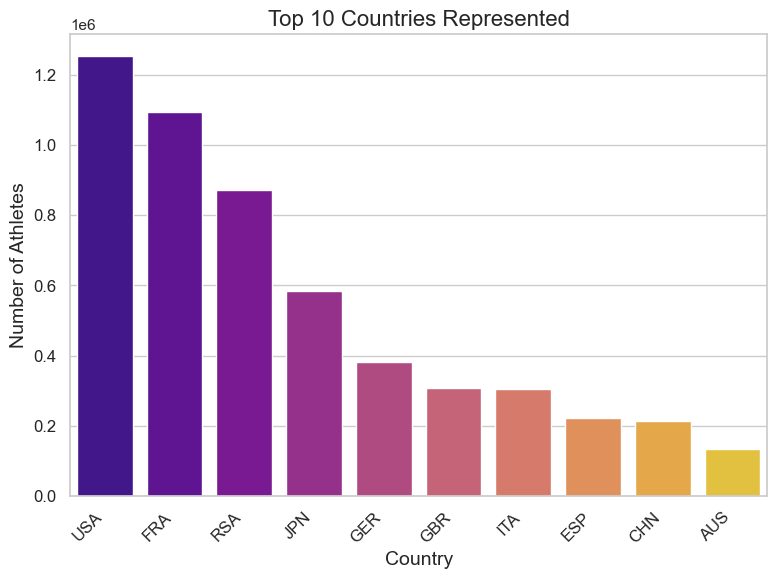

In [37]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create bar chart
plt.figure(figsize=(9, 6))
sns.barplot(x=runners_per_country.head(10).index, y=runners_per_country.head(10), palette="plasma")

# Add titles and labels
plt.title('Top 10 Countries Represented', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and adjust x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis labels font size

plt.show()

<br>

#### 2. Exploring 'Athlete Performace'

**a) Summary Statistics**

In [38]:
df6['Athlete Performace (hours as a decimal)'].describe().round(1)

count    6791166.0
mean          11.3
std            6.8
min            0.0
25%            6.8
50%            9.5
75%           12.9
max           48.0
Name: Athlete Performace (hours as a decimal), dtype: float64

**b) Histogram to Visualise the Distribution of Athlete Performance Across Different Time Intervals.**

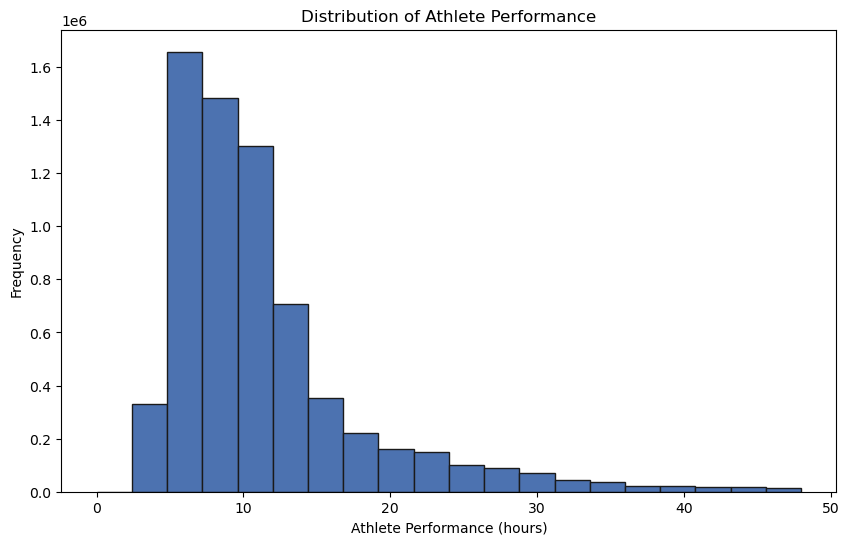

In [69]:
plt.style.use('default')

plt.figure(figsize=(10, 6))
plt.hist(df6['Athlete Performace (hours as a decimal)'], bins=20, edgecolor='k',color='b')
plt.title('Distribution of Athlete Performance')
plt.xlabel('Athlete Performance (hours)')
plt.ylabel('Frequency')
plt.show()

<br>

#### 3. Pie Chart to Illustrate the Percentage of Male vs Female Participants

**Define the Data**

In [40]:
gender_counts = df6['Athlete Gender'].value_counts()
male_count = gender_counts['M']
female_count = gender_counts['F']
total_count = male_count + female_count

male_proportion = male_count / total_count * 100
female_proportion = female_count / total_count * 100

**Create the Pie Chart**

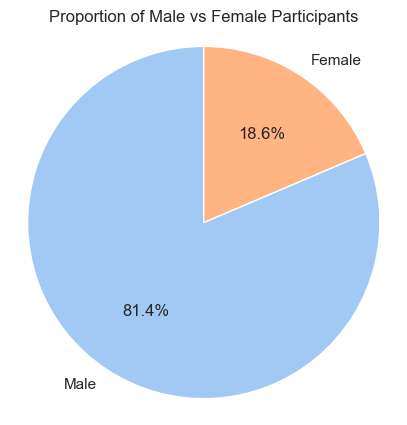

In [41]:
# Labels and sizes for the pie chart
labels = ['Male', 'Female']
sizes = [male_proportion, female_proportion]
colors = sns.color_palette("pastel")[0:2]

# Creating the pie chart
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio to ensure the pie is drawn as a circle.
ax.axis('equal')

plt.title('Proportion of Male vs Female Participants')
plt.show()

<br>

### TESTING HYPOTHESES

#### Hypothesis 1: "The longer the race, the lower the percentage of finishers"

**Filtering the dataset to include only races with more than 100 participants.**

In [42]:
runners_100 = df6[df6['Total Number of Athletes'] > 100]

**Selecting the top 10 hardest events**

In [43]:
# Aggregating the data
aggregated_runners_100 = runners_100.groupby('Event Name and Year').agg({'Event Percentage of Finishers': 'mean','Event Length(km)': 'mean'}).reset_index()

# Sorting by the percentage of finishers in ascending order (hardest events first)
sorted_df = aggregated_runners_100.sort_values(by='Event Percentage of Finishers')

# Selecting the top 10 hardest events
top_10_hardest_events = sorted_df.head(10)

In [44]:
top_10_hardest_events

,Event Name and Year,Event Percentage of Finishers,Event Length(km)
1075,Badger Trail Races by Ten Junk Miles Racing (U...,28.414286,108.078151
1076,Badger Trail Races by Ten Junk Miles Racing (U...,32.650698,109.372093
1594,Boubín-Libín-Kleť (BLK) (CZE) 2016,33.997414,104.905172
9706,Run Around Taipei 70 Km (TPE) 2016,34.888957,70.000000
14978,Winter Marathon Titan (RUS) 2017,35.047977,50.000000
11454,The Bello Gallico Trail (BEL) 2016,36.246231,81.281407
14993,Woodside Trail Run 50K (USA) 2010,36.598585,50.000000
13281,Tryavna-Ultra (BUL) 2022,37.682682,98.648045
9701,Run Around Taipei 60 Km (TPE) 2016,37.711905,60.000000
13280,Tryavna-Ultra (BUL) 2021,41.025698,93.581006


**Creating a Dual-Axis Chart to Visualise the Data**

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_57469/519030576.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_hardest_events['Event Name and Year'], rotation=45, ha='right',fontsize=8)  # Rotate the x-axis labels


Text(0.5, 1.0, 'The Top 10 Hardest Ultramarathon Races to Finish')

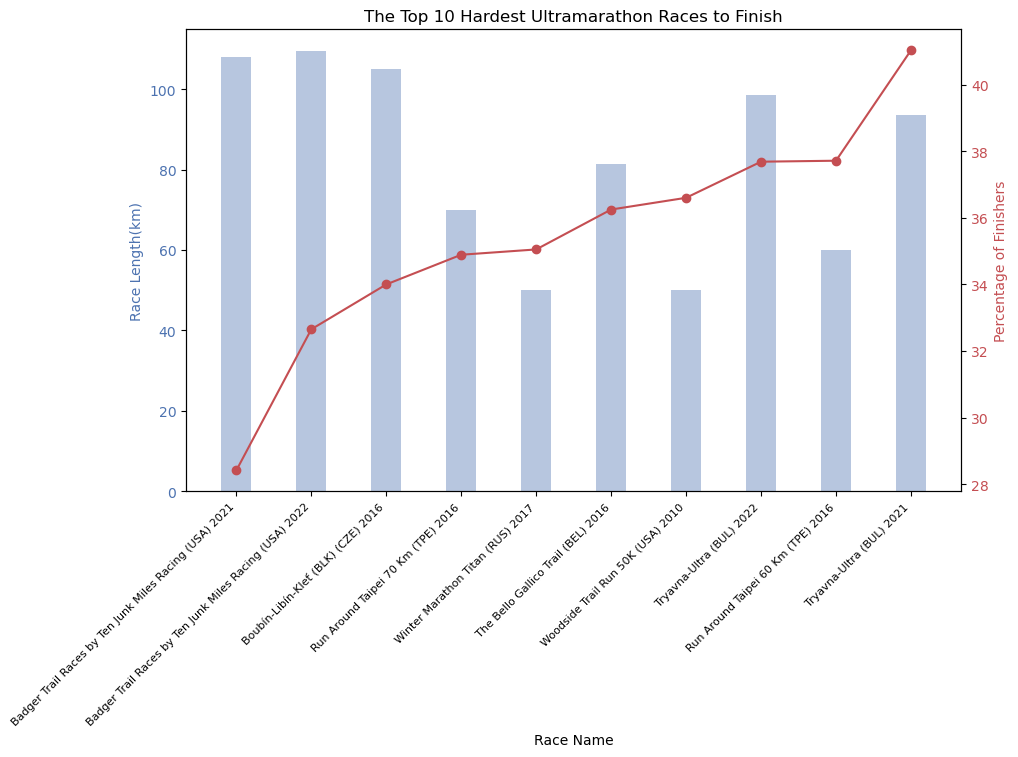

In [65]:
plt.style.use('default')

fig, ax1 = plt.subplots(figsize=(10,6))

# Creating a bar chart to show the race length. 
bar_width = 0.4
ax1.bar(top_10_hardest_events['Event Name and Year'], top_10_hardest_events['Event Length(km)'], width=bar_width, color='b', alpha=0.4)
ax1.set_xlabel('Race Name')
ax1.set_ylabel('Race Length(km)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(top_10_hardest_events['Event Name and Year'], rotation=45, ha='right',fontsize=8)  # Rotate the x-axis labels

# Creating a second y-axis to show the % of finishers.  
ax2 = ax1.twinx()
ax2.plot(top_10_hardest_events['Event Name and Year'], top_10_hardest_events['Event Percentage of Finishers'], color='r', marker='o', linestyle='-')
ax2.set_ylabel('Percentage of Finishers', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('The Top 10 Hardest Ultramarathon Races to Finish')

**Insights:**
- The hypothesis does not hold - we can see that event % of finishers is not negatively correlated with event length.
- This could be because:
    a) different races have different terrains, climates etc.
    b) athletes attempting the longer races may be more competent.
- One interesting observation is that the Badger Trail Races (USA) appears twice (2021 and 2022 race) so it must be an especially difficult race to finish!

<br>

#### Hypothesis 2: "The longer the race, the fewer the participants" 

**As the majoirty of the races are below 500km, we will look at races within this range.** 

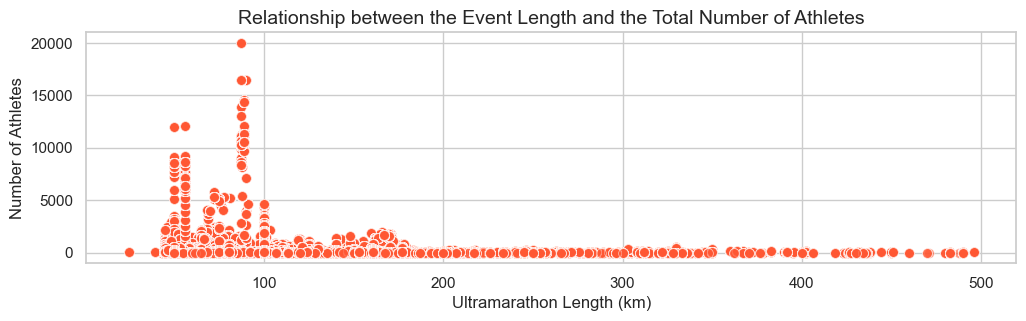

In [46]:
plt.figure(figsize=(12, 3))
sns.scatterplot(x='Event Length(km)', y='Total Number of Athletes', data=df6[df6['Event Length(km)']<500], color='#FF5733', s=50, alpha=0.6)
plt.title('Relationship between the Event Length and the Total Number of Athletes', fontsize=14)
plt.xlabel('Ultramarathon Length (km)', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)
plt.grid(True)
plt.show()

**Insights:**
- The hypothesis appears to hold - races less than 100km have  the most athletes. 

<br>

#### Hypothesis 3: "The popularity of ultramarathons has increased over time"

**Groupby 'Event Name and Year' to obtain the total number of athletes for each event across different years.**

In [47]:
 aggregated_event_data = df6.groupby('Event Name and Year').mean('Total Number of Athletes').reset_index()[['Event Name and Year', 'Year of Event', 'Total Number of Athletes']]
per_race_per_year = aggregated_event_data.sort_values(by='Year of Event')

In [48]:
per_race_per_year.head()

,Event Name and Year,Year of Event,Total Number of Athletes
3229,64 miles Ury (GBR) 1800,1800.0,1.0
52929,Thirsk 50 miles (GBR) 1801,1801.0,2.0
52930,Thirsk 51 miles (GBR) 1801,1801.0,1.0
3463,90 miles Hull (GBR) 1801,1801.0,1.0
3228,64 miles London (GBR) 1802,1802.0,1.0


**Groupby 'Year of Event' in per_race_per_year to obtain the average number of athletes across all races per year.**

In [49]:
by_year = per_race_per_year.groupby('Year of Event').mean('Total Number of Athletes').reset_index()

In [50]:
by_year.head(5)

,Year of Event,Total Number of Athletes
0,1800.0,1.000000
1,1801.0,1.333333
2,1802.0,1.000000
3,1805.0,1.000000
4,1809.0,1.000000


**Create a Line Chart**

Text(0.5, 1.0, 'The Evolution of Ultramarathon Participation: 18th-20th century insights')

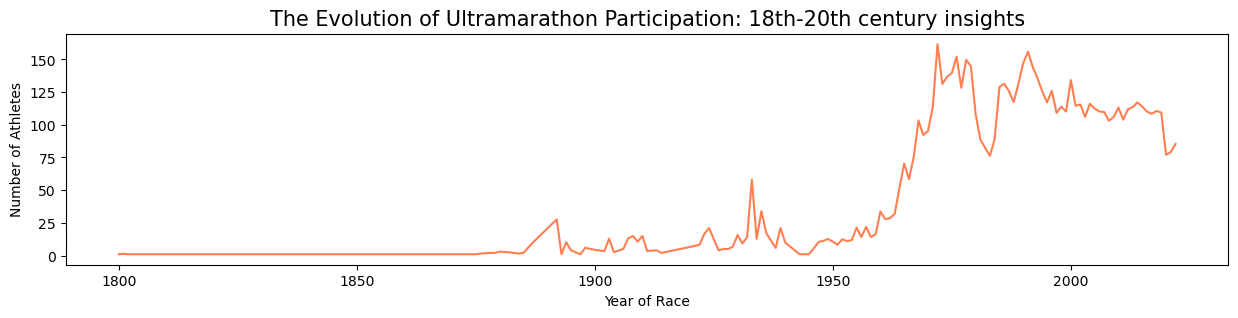

In [73]:
fig,axes = plt.subplots(figsize=(15,3))

axes.plot(by_year['Year of Event'],by_year['Total Number of Athletes'],color='coral')
axes.set_xlabel('Year of Race')
axes.set_ylabel('Number of Athletes')
axes.set_title('The Evolution of Ultramarathon Participation: 18th-20th century insights',fontsize=15)

**Filter by Races in the 19th, 20th and 21st Century**

In [52]:
nineteenth = by_year[(by_year['Year of Event'] > 1799) & (by_year['Year of Event'] < 1900)]
twentieth = by_year[(by_year['Year of Event'] > 1899) & (by_year['Year of Event'] < 2000)]
twentifirst = by_year[(by_year['Year of Event'] > 1999) & (by_year['Year of Event'] < 3000)]

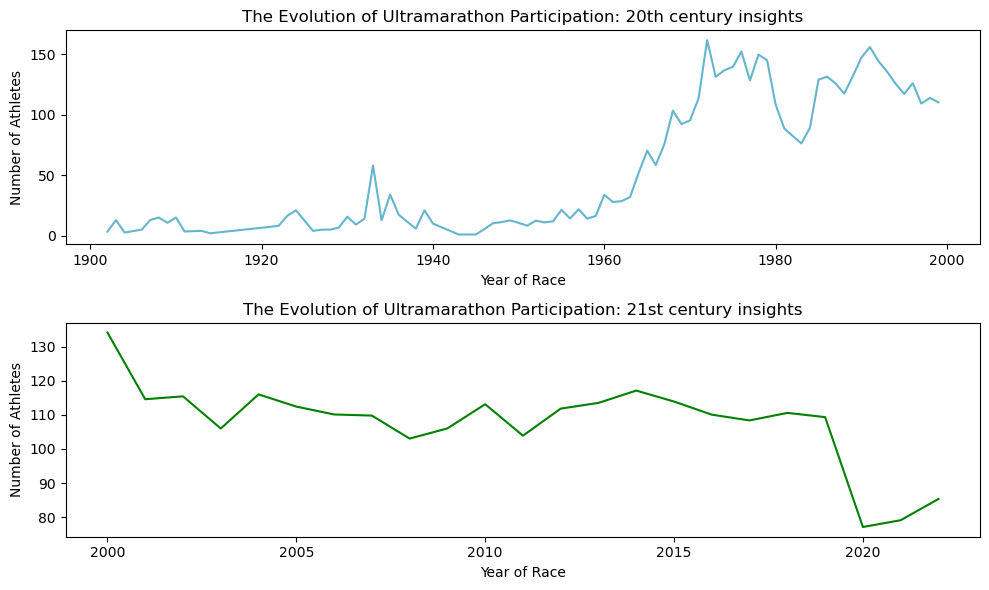

In [74]:
# Plotting 2 subplots to see the evolution of race participants.

fig,axes = plt.subplots(nrows=2,figsize=(10,6))

axes[0].plot(twentieth['Year of Event'], twentieth['Total Number of Athletes'],color='c')
axes[0].set_xlabel('Year of Race')
axes[0].set_ylabel('Number of Athletes')
axes[0].set_title('The Evolution of Ultramarathon Participation: 20th century insights',fontsize=12)

axes[1].plot(twentifirst['Year of Event'],twentifirst['Total Number of Athletes'],color='green')
axes[1].set_xlabel('Year of Race')
axes[1].set_ylabel('Number of Athletes')
axes[1].set_title('The Evolution of Ultramarathon Participation: 21st century insights',fontsize=12)

plt.tight_layout()

**Insights:**
- The hypothesis appears to partially hold - the visuals show that the popularity of races increased throughout the 1900s but peaked in 1990; from there, there has been a steady decline in popularity until 2020.

<br>

#### Hypothesis 4: "There is a negative correlation between speed and race distance" 

**We will look at the data for male and female athletes, separately.**

In [55]:
male_athletes = df6[df6['Athlete Gender'] == 'M']
female_athletes = df6[df6['Athlete Gender'] == 'F']

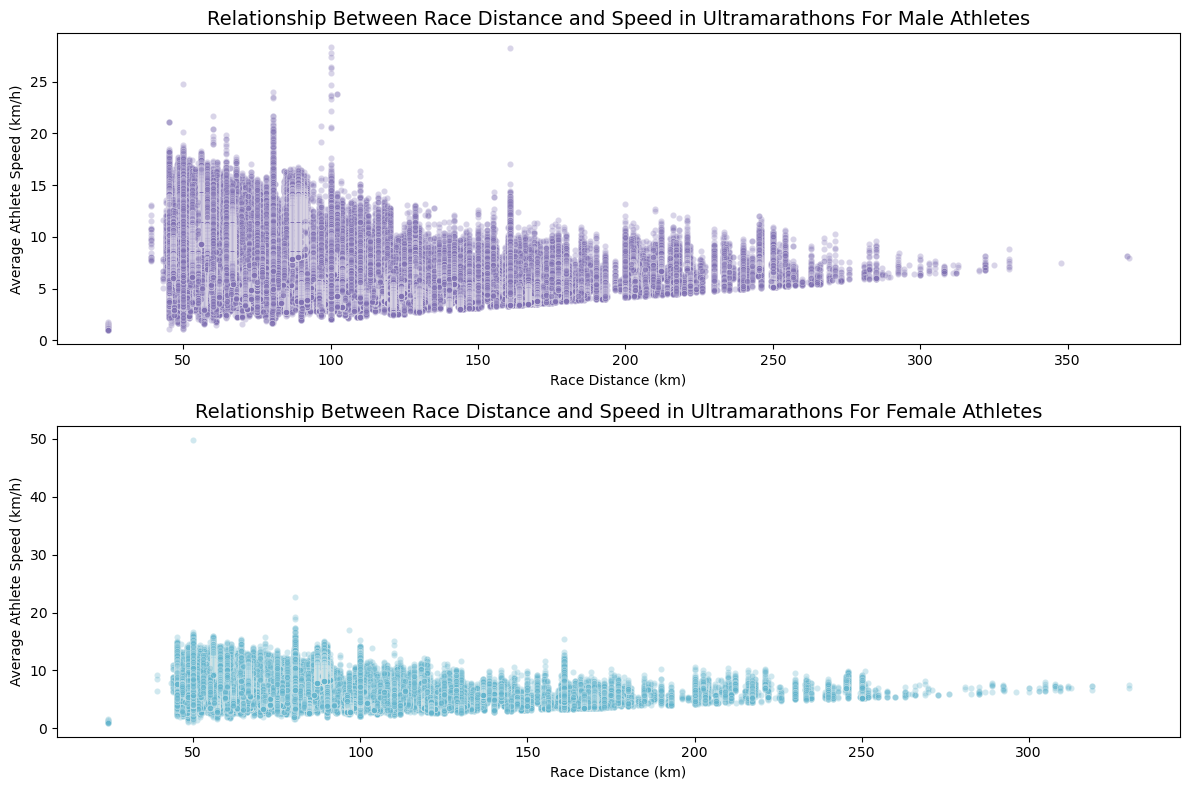

In [77]:
fig,axes = plt.subplots(nrows=2,figsize=(12, 8))

sns.scatterplot(x='Event Length(km)',y='Updated Average Speed (km/h)', data = male_athletes,ax=axes[0], color='m', s=20, alpha=0.3)
axes[0].set_xlabel('Race Distance (km)')
axes[0].set_ylabel('Average Athlete Speed (km/h)')
axes[0].set_title('Relationship Between Race Distance and Speed in Ultramarathons For Male Athletes',fontsize=14)

sns.scatterplot(x='Event Length(km)',y='Updated Average Speed (km/h)', data = female_athletes,ax=axes[1], color='c', s=20,alpha=0.3)
axes[1].set_xlabel('Race Distance (km)')
axes[1].set_ylabel('Average Athlete Speed (km/h)')
axes[1].set_title('Relationship Between Race Distance and Speed in Ultramarathons For Female Athletes',fontsize=14)

plt.tight_layout()
plt.show()

**Insights:**
There is no clear correlation or trend within this analysis.

<bv>

#### Hypothesis 5: "Longer races are more likley to have younger participants"

**Comparing the average athlete ages for the top 100 longest races vs top 100 shortest races**

In [60]:
# Groupby 'Event Name and Year' to obtain the total number of athletes for each event across different years. 
aggregated_event_name_long = df6.groupby('Event Name and Year').mean('Athlete Age').reset_index()[['Event Name and Year','Athlete Age','Event Length(km)']]
age__vs_length = aggregated_event_name_long.sort_values(by='Event Length(km)')

In [61]:
top_10_races = age__vs_length

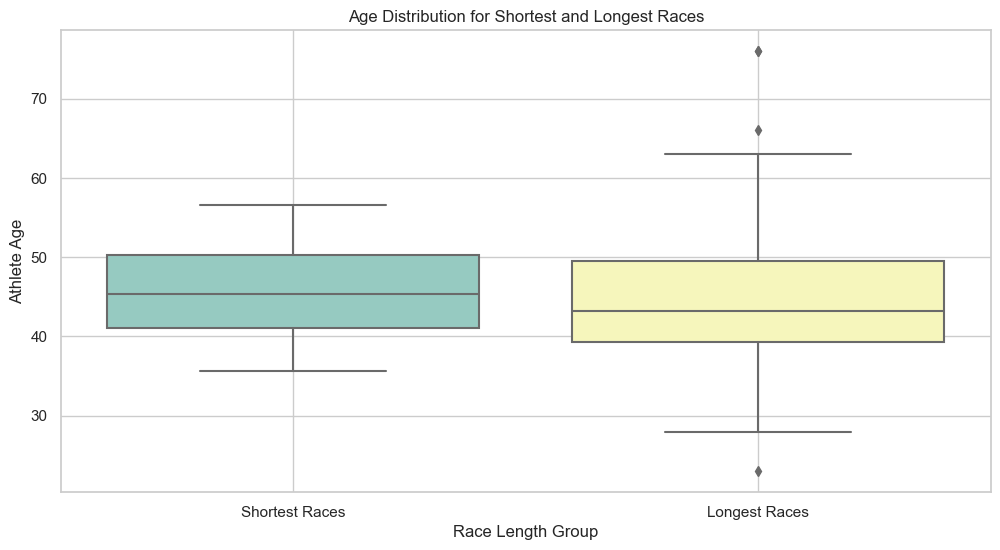

In [62]:
# Defining shortest and longest races (top 10)
shortest_races = top_10_races.head(100)  # values in top_10_races are sorted by event_length so head shows the shortest 100 races
longest_races = top_10_races.tail(100)   # values in top_10_races are sorted by event_length so head shows the shortest 100 races

# Visualisation
plt.figure(figsize=(12, 6))

# Box plot for age comparison
sns.boxplot(data=[shortest_races['Athlete Age'], longest_races['Athlete Age']], palette="Set3")
plt.xticks([0, 1], ['Shortest Races', 'Longest Races'])
plt.title('Age Distribution for Shortest and Longest Races')
plt.xlabel('Race Length Group')
plt.ylabel('Athlete Age')
plt.grid(True)

**Insights:**
The median age for longer races is lower, but only marginally. However we can also see that there is a greater range of ages for longer races. In particular, the oldest athlete in the shorter race group is ~57, whereas there are clearly athletes older than this in the longer race group. 